In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


Hour of highest frequence of crimes:  12


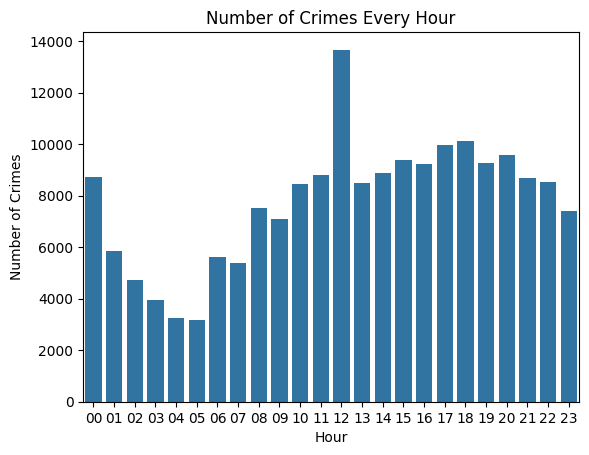

In [23]:
crimes['crime_hour'] = crimes['TIME OCC'].str.extract(r'^(\d{2})')
crime_hours = crimes['crime_hour'].value_counts().to_frame().reset_index().astype(int)
crime_hours.columns = ['crime_hour', 'crime_num']
peak_crime_hour = crime_hours.sort_values(by='crime_num', ascending=False)['crime_hour'].values[0]
print('Hour of highest frequence of crimes: ', peak_crime_hour)

order = sorted(crimes['crime_hour'].unique())
sns.countplot(data=crimes, x='crime_hour', order=order)
plt.title("Number of Crimes Every Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.show()

In [24]:
crimes['TIME OCC'] = crimes['TIME OCC'].astype(int)
night_crimes = crimes[(crimes['TIME OCC']>=2200) | (crimes['TIME OCC']<359)]
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().sort_values(ascending=False).index[0]
print('Most Crimes Area during Night: ', peak_night_crime_location)

Most Crimes Area during Night:  Central


victim_age_category
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


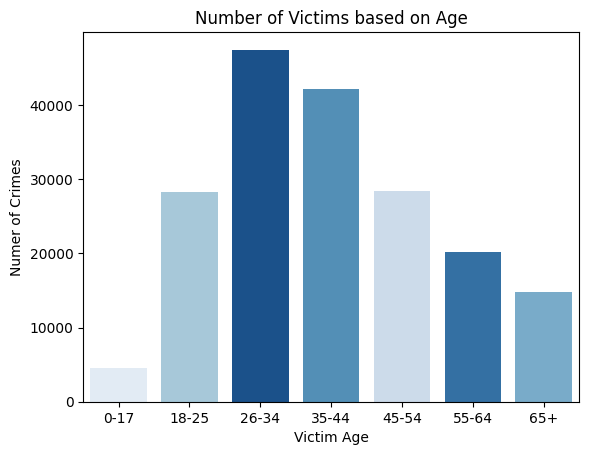

In [25]:
age_category = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
conditions = [
    ((crimes['Vict Age']>=0)&(crimes['Vict Age']<=17)),
    ((crimes['Vict Age']>=18)&(crimes['Vict Age']<=25)),
    ((crimes['Vict Age']>=26)&(crimes['Vict Age']<=34)),
    ((crimes['Vict Age']>=35)&(crimes['Vict Age']<=44)),
    ((crimes['Vict Age']>=45)&(crimes['Vict Age']<=54)),
    ((crimes['Vict Age']>=55)&(crimes['Vict Age']<=64)),
    (crimes['Vict Age']>=65)
]
crimes['victim_age_category'] = np.select(conditions, age_category, default="")
victim_ages = crimes['victim_age_category'].value_counts()
print(victim_ages)

sns.countplot(data=crimes, x='victim_age_category', hue='victim_age_category', order=age_category, palette='Blues_r')
plt.title('Number of Victims based on Age')
plt.xlabel('Victim Age')
plt.ylabel('Numer of Crimes')
plt.show()